## Pre Data Analysis

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
    StratifiedKFold, GridSearchCV, train_test_split
)
from sklearn import metrics

from os import cpu_count
random_state = 35
n_jobs = max(cpu_count()-1, 1)

In [35]:
data = pd.read_csv("house_prices_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
premium          21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [36]:
# id and date is useless in predicting(in this case)
data.drop(['id','date'], axis = 1, inplace = True)
# it is easy to notice that sqrt_living is the sum of sqrt_above and sqrt_basement, so sqrt_living can be also dropped
data.drop(['sqft_living'], axis = 1, inplace = True)

In [37]:
data.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,premium,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,1.510697e+04,1.494309,0.007542,0.234303,3.409430,0.075695,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,4.142051e+04,0.539989,0.086517,0.766318,0.650743,0.264516,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,0.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,0.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


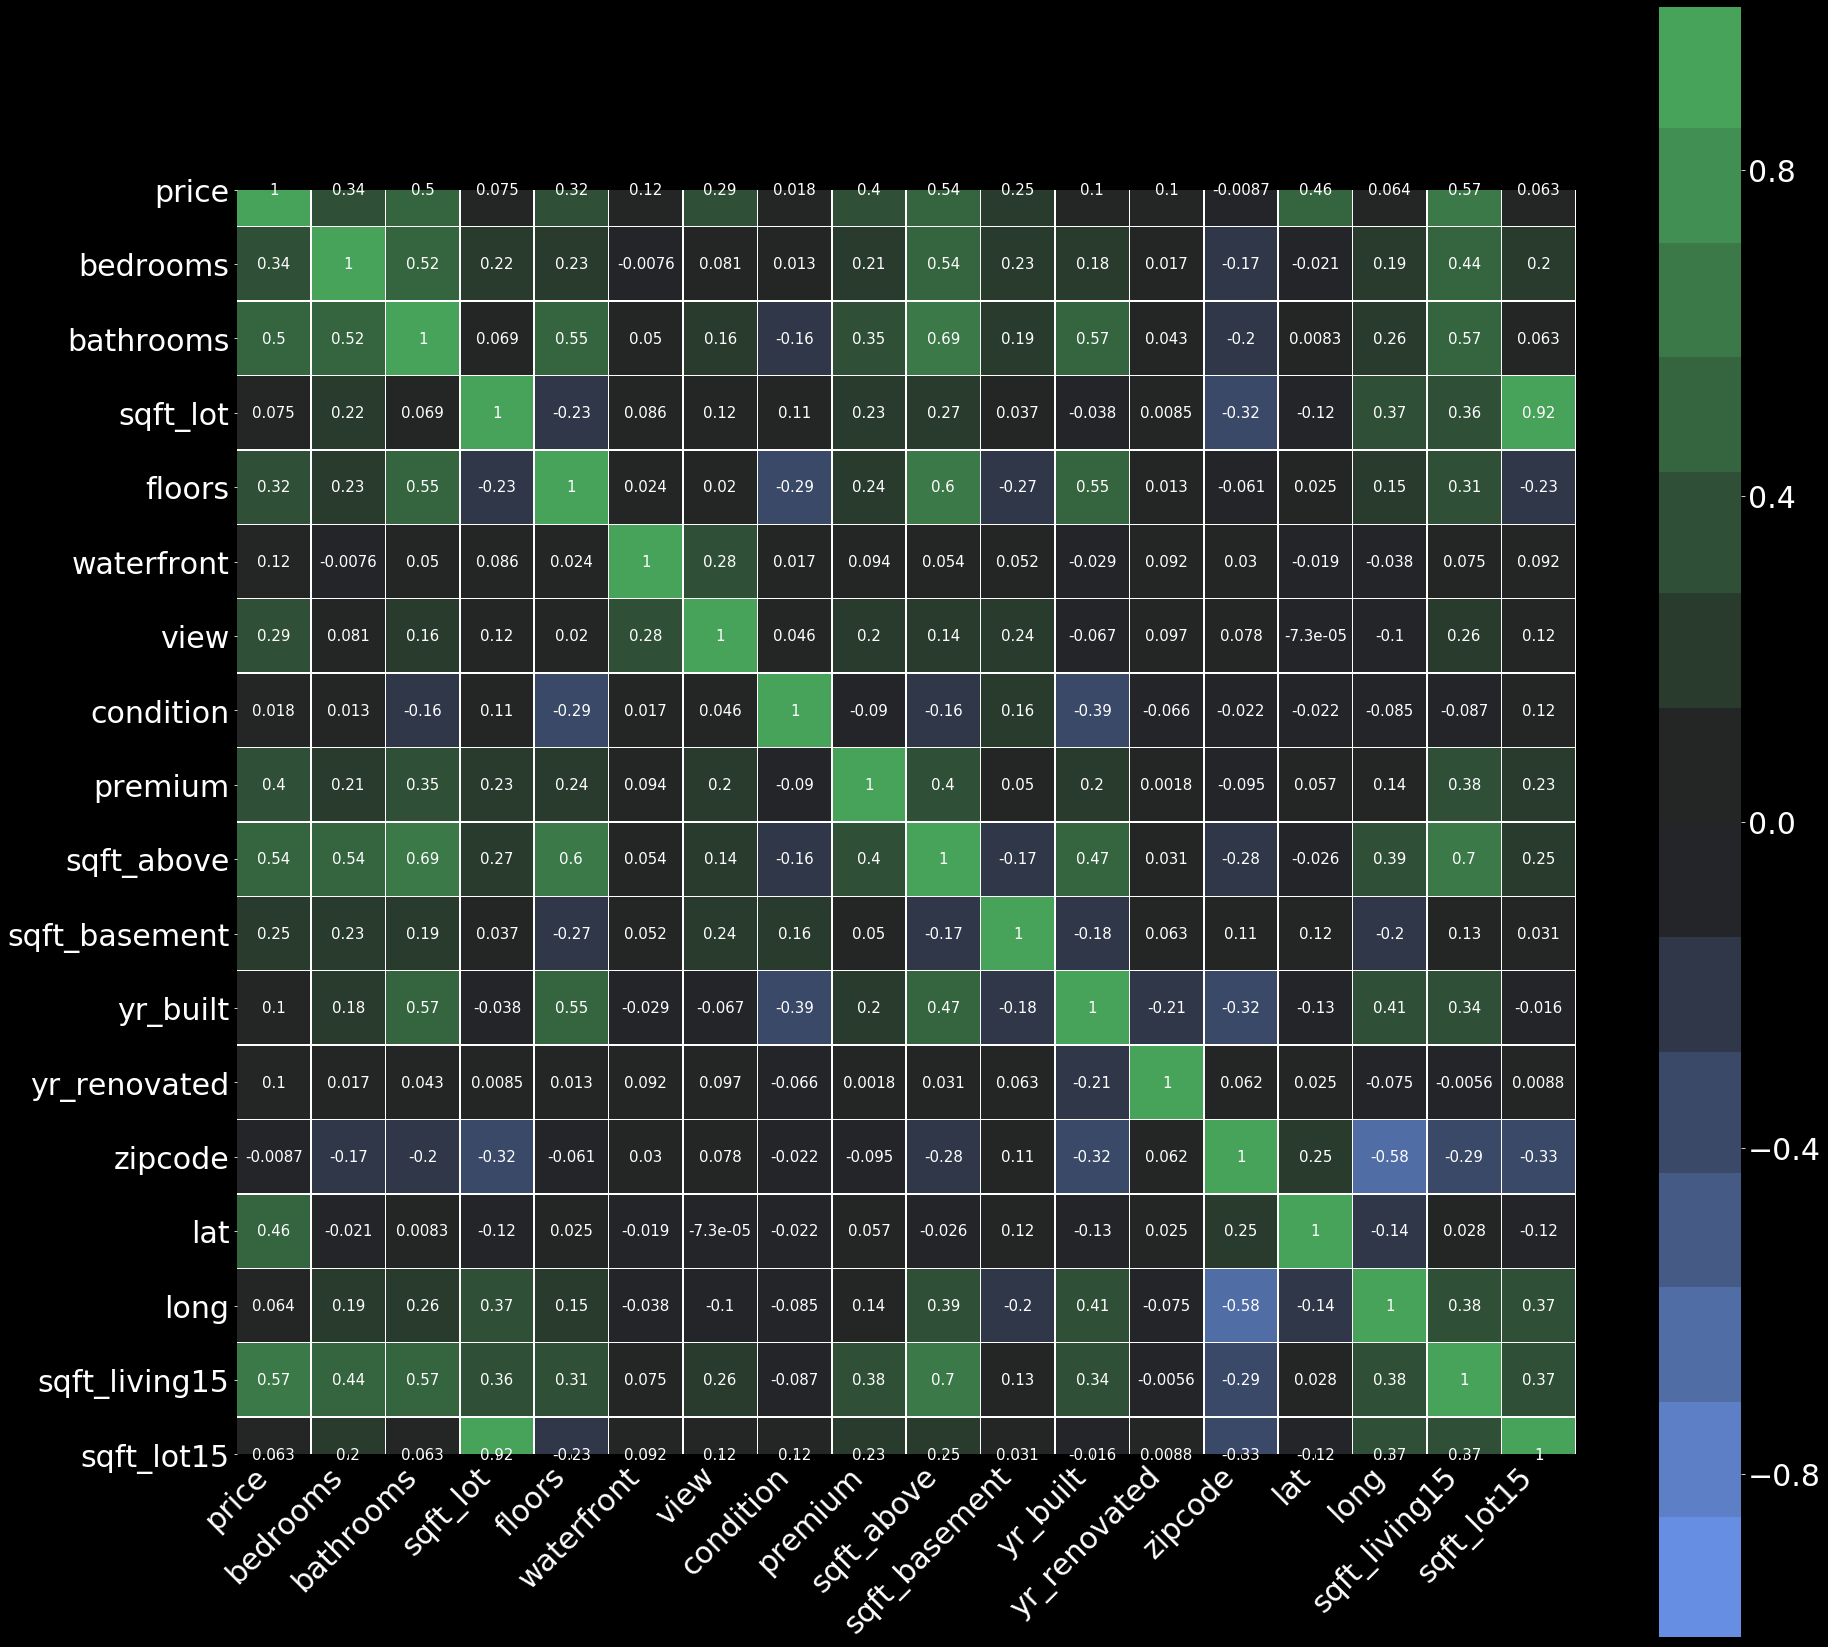

In [38]:
# using spearman method(will be more stable if outliers occur)
corr = data.corr(method='spearman')
plt.rcParams["figure.figsize"] = [30,30]
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot =True,
    cmap = sns.diverging_palette(255, 133, l=60, n=14, center="dark"),
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# so, according ho this corr. we can't drop any column, 
# because it all are required by at least one of price or premium

<Figure size 2160x2160 with 0 Axes>

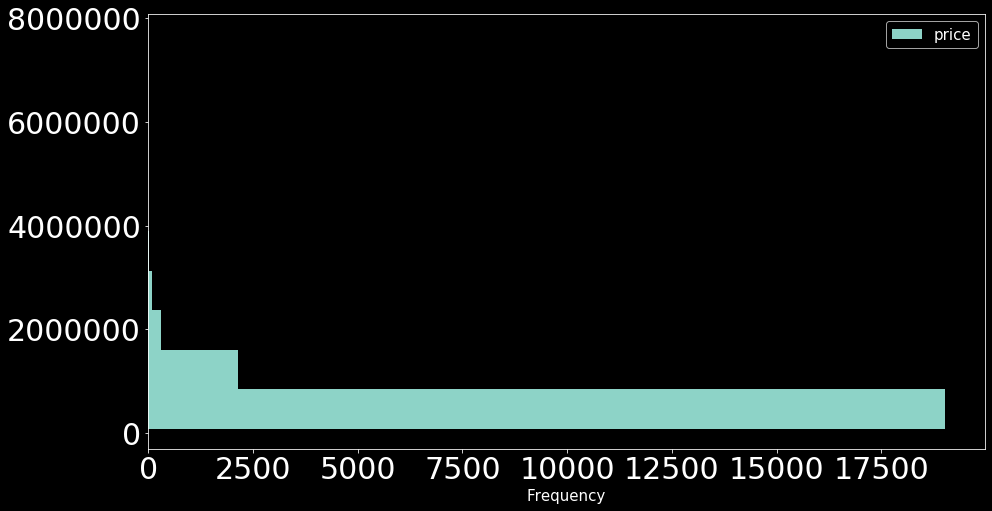

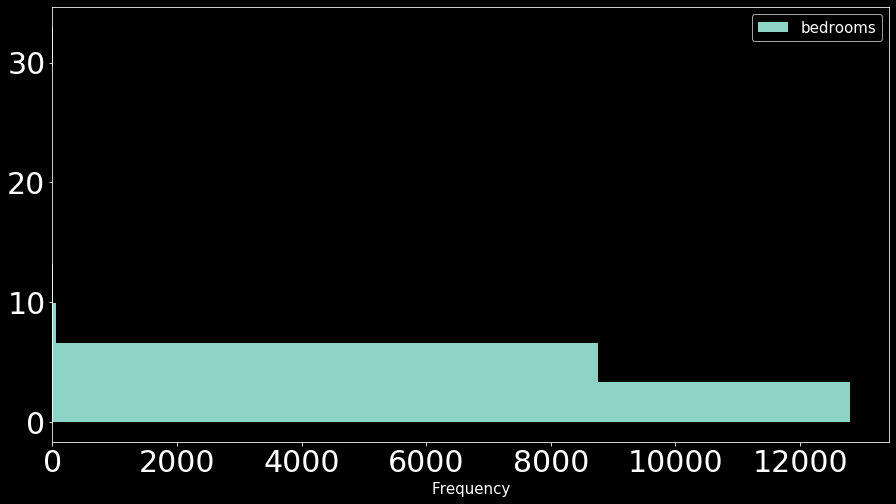

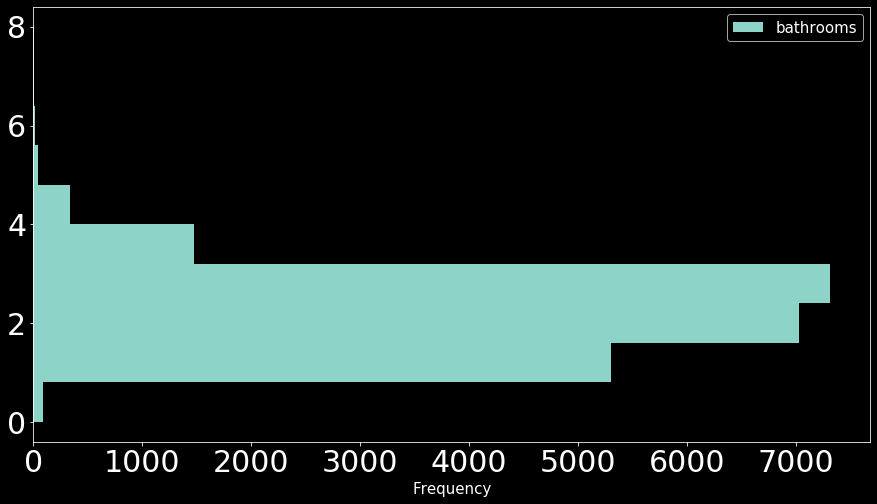

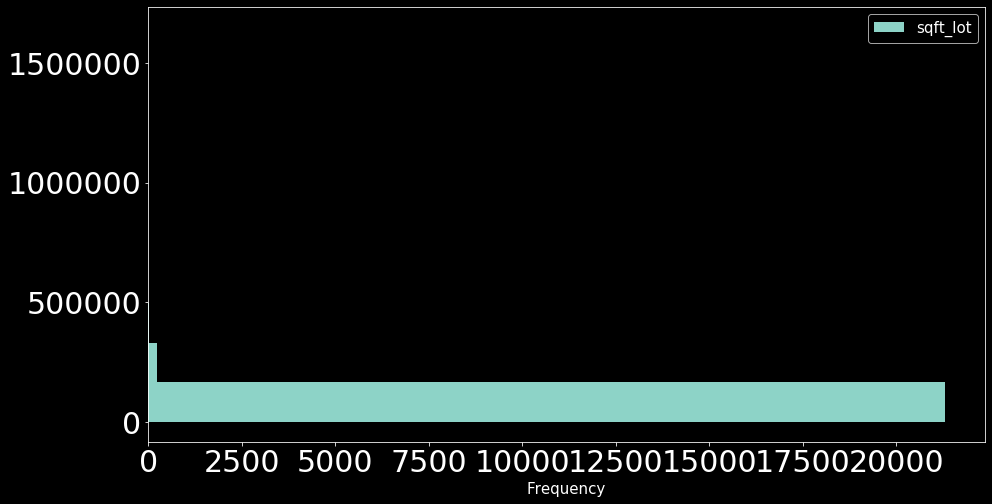

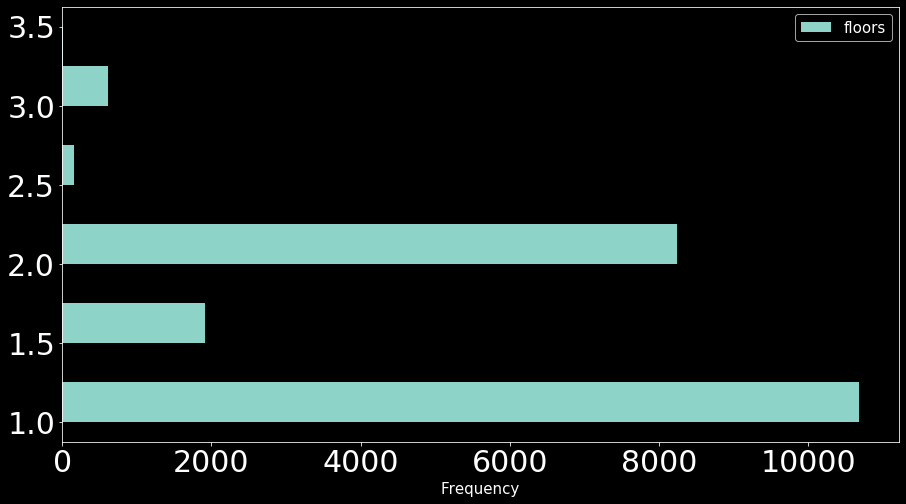

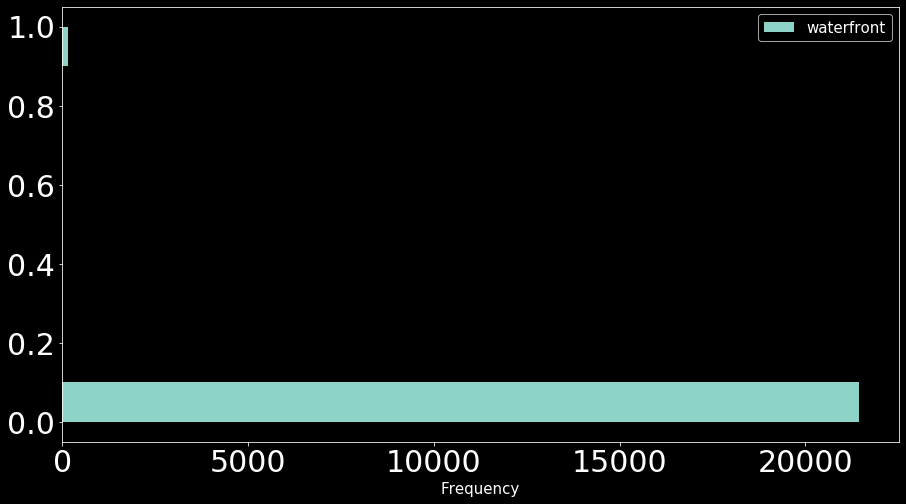

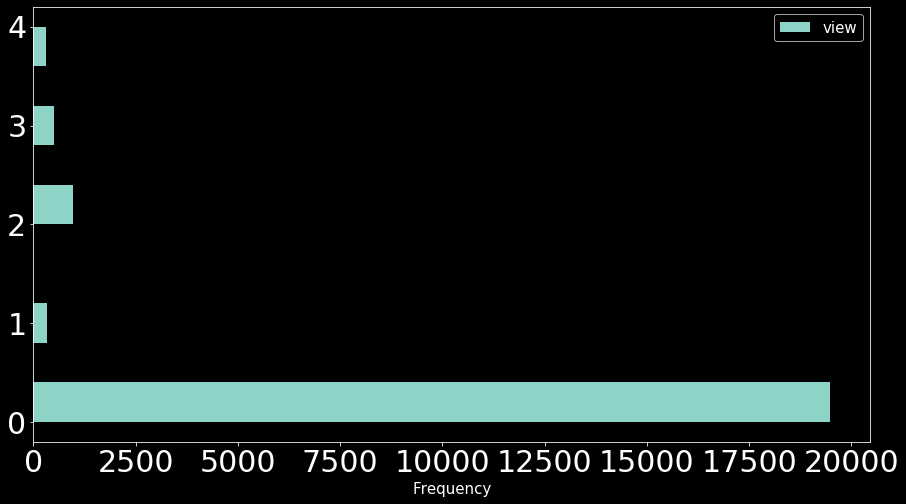

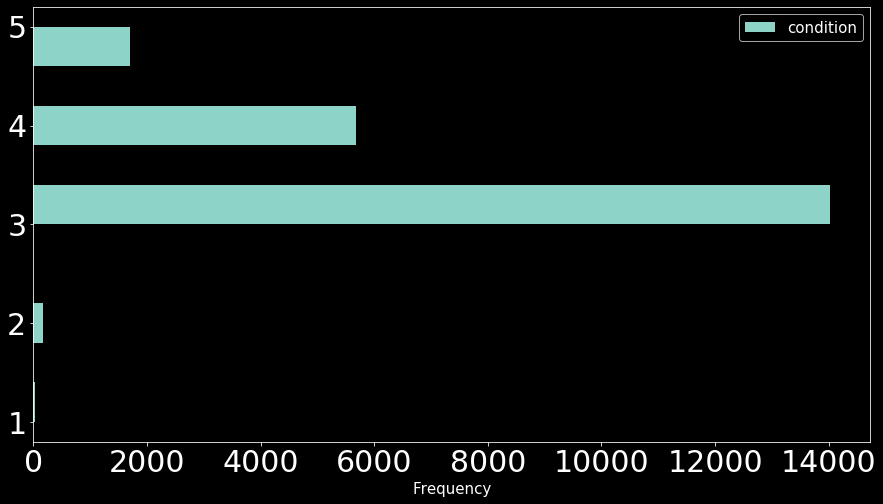

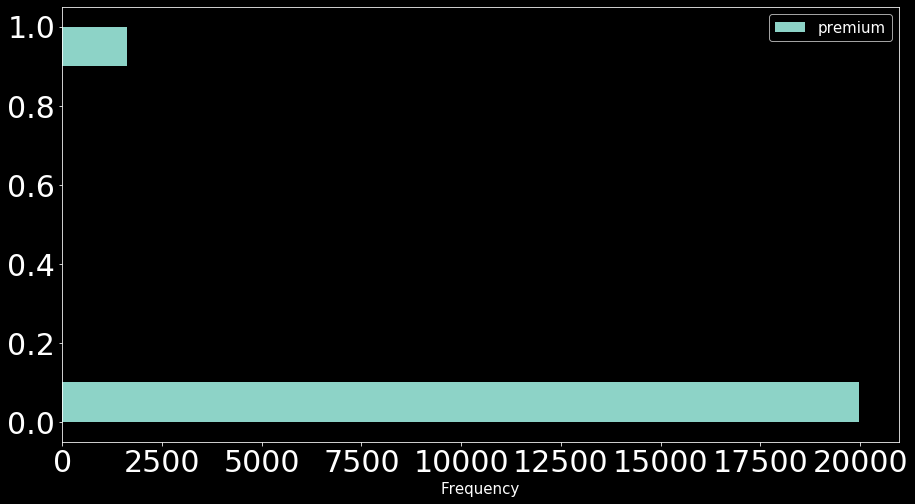

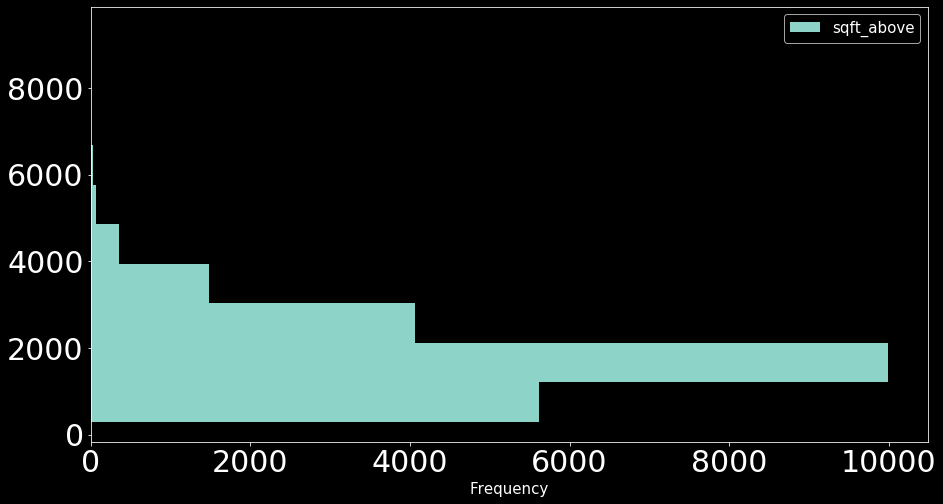

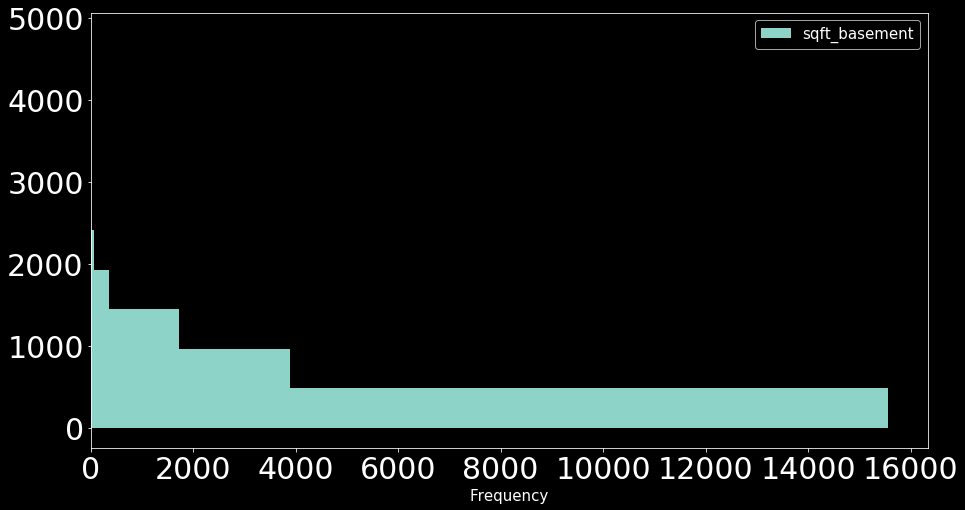

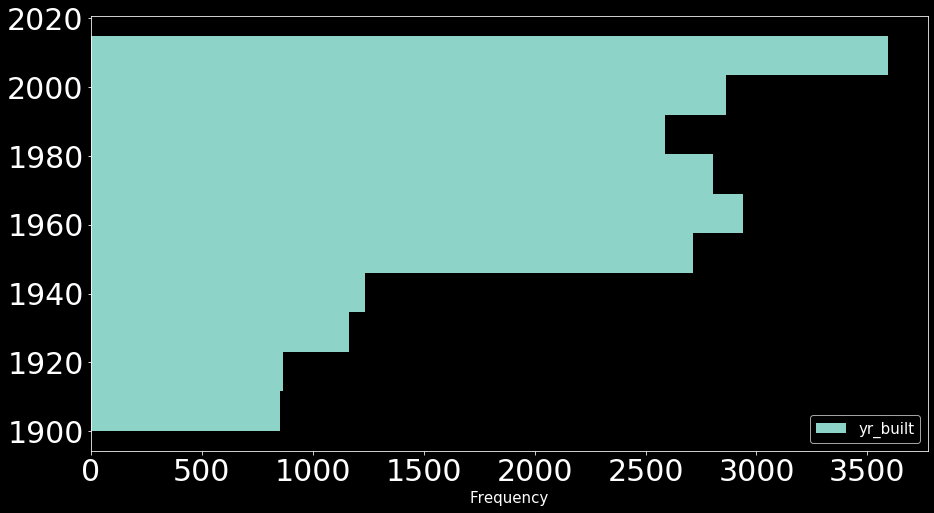

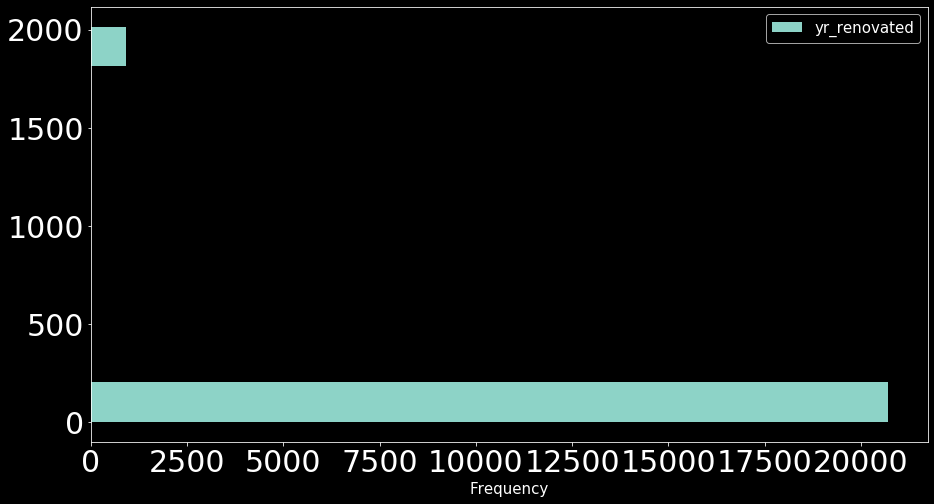

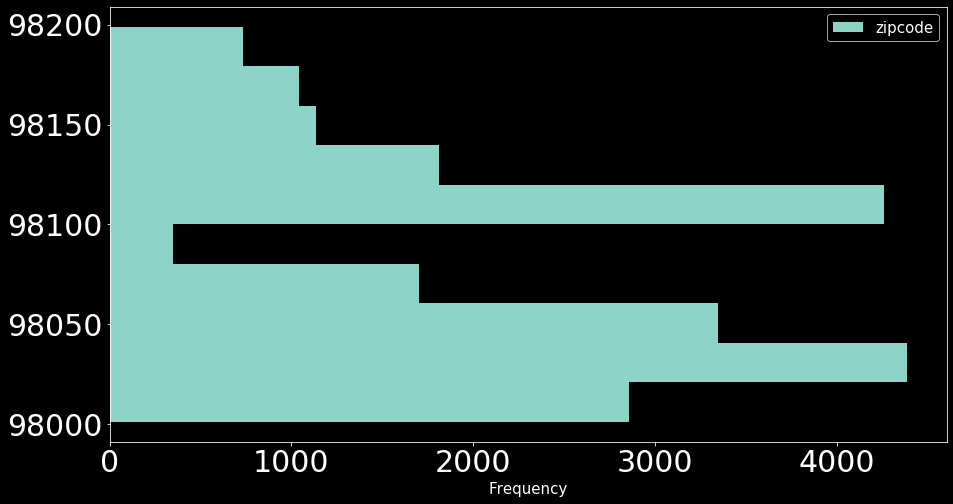

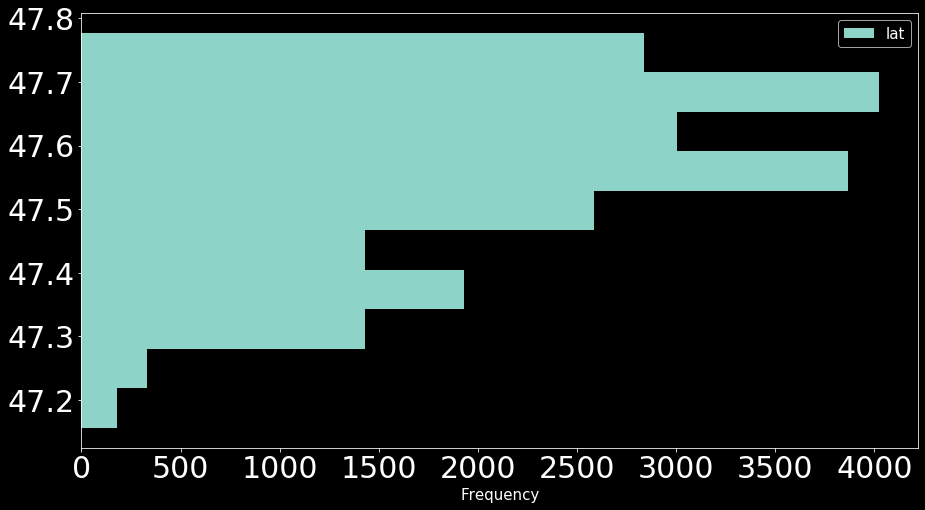

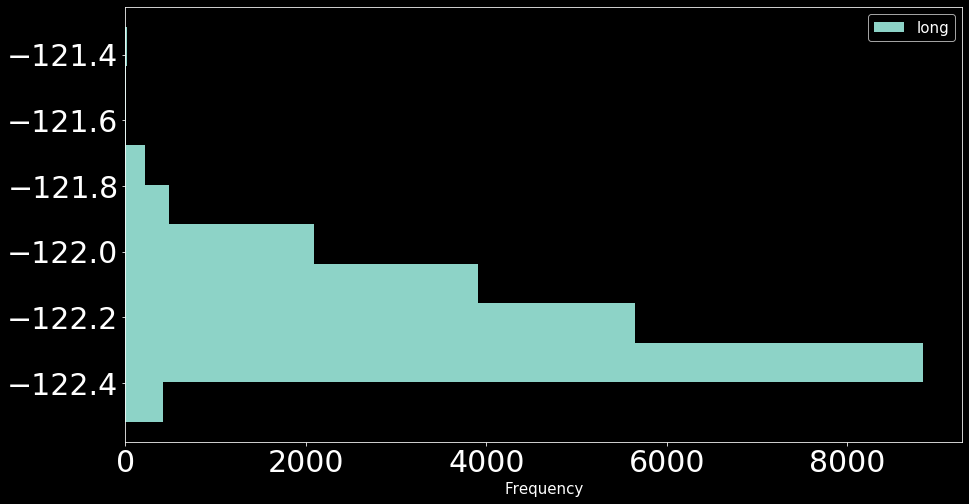

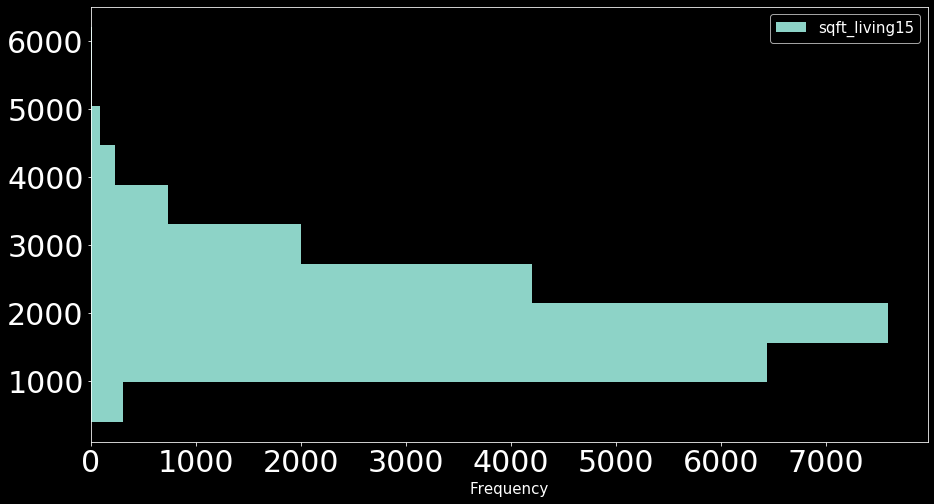

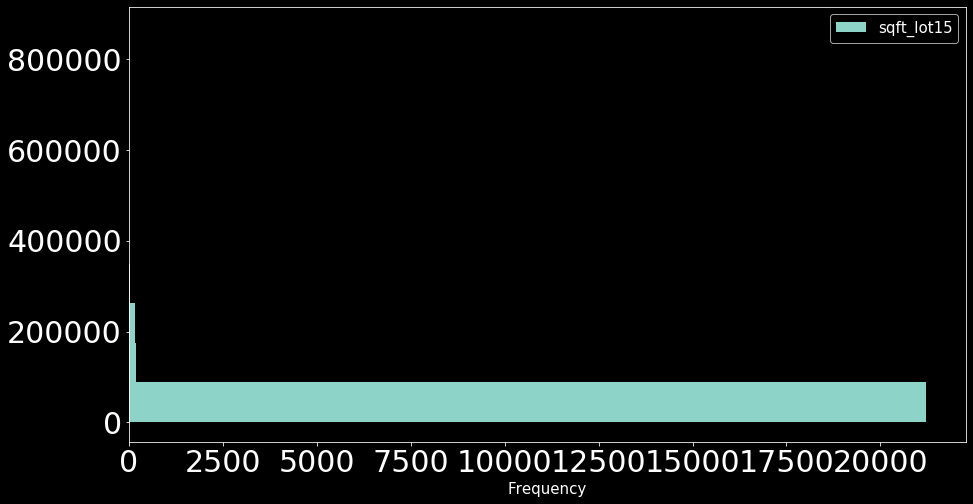

In [39]:
plt.style.use('dark_background')
plt.figure()
plt.rcParams.update({'font.size': 15, 'figure.figsize':[15,8]})
for col in data.columns:
    data[col].to_frame().plot.hist(orientation='horizontal')


In [40]:
# converting yr_renovated to 1\0 values because of inefficacy of big values(years) 
yr_ren_title = [yr != 0 for yr in data['yr_renovated']]
data['yr_renovated'] = pd.Series(yr_ren_title)
data.sample(5)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,premium,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6095,713900,3,2.50,167706,1.0,0,0,3,1,3370,0,2000,False,98038,47.4379,-122.022,3350,213444
19976,459000,2,2.50,1249,3.0,0,0,3,0,1240,0,2006,False,98107,47.6718,-122.386,1240,2500
17724,475000,3,1.75,2805,1.5,0,0,3,0,1340,0,1919,False,98144,47.5922,-122.297,1650,2805
20982,845950,5,2.75,9600,2.0,0,0,3,0,3650,800,2014,False,98011,47.7336,-122.210,4000,9750
15408,398000,4,2.50,14724,2.0,0,0,3,0,2050,0,1989,False,98019,47.7300,-121.969,1920,12841


In [41]:
from collections import Counter
# Outlier detection 
def detect_outliers(input_data,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        q1 = np.percentile(input_data[col], 25)
        # 3rd quartile (75%)
        q3 = np.percentile(input_data[col],75)
        # Interquartile range (IQR)
        iqr = q3 - q1
        
        # outlier step
        outlier_step = 1.5 * iqr
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = input_data[(input_data[col] < q1 - outlier_step) | (input_data[col] > q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [42]:
# categorical params of the price
categorical_features = ['bedrooms','bathrooms','floors','waterfront','condition','premium','yr_renovated',]
# big numerical params of the price
numerical_features = ['price','sqft_lot','sqft_above','sqft_basement','yr_built','zipcode','lat','long','sqft_lot15']

# detect outliers from data
outliers_to_drop = detect_outliers(data, 2, categorical_features)
outliers_to_drop.extend(detect_outliers(data, 3, numerical_features))
outliers_to_drop.extend(detect_outliers(data, 0, ['price']))
outliers_to_drop = np.unique(outliers_to_drop)

In [43]:
print("Outliers: " + str(len(outliers_to_drop)))
#data.loc[outliers_to_drop].head(50) # Show the outliers rows
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop=True)
data.describe()

Outliers: 1178


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,premium,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.043500e+04,20435.000000,20435.000000,2.043500e+04,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000,20435.000000
mean,4.764243e+05,3.327233,2.048752,1.447701e+04,1.475336,0.002887,0.170981,3.406851,0.043846,1705.617323,266.491754,1970.803768,98078.568485,47.556914,-122.213448,1920.965354,12374.485393
std,2.078420e+05,0.908908,0.707081,3.964959e+04,0.536865,0.053656,0.637350,0.646909,0.204758,723.227245,407.822170,29.160131,53.333928,0.141069,0.142175,613.517887,26308.077973
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.150000e+05,3.000000,1.500000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,0.000000,1170.000000,0.000000,1951.000000,98033.000000,47.460200,-122.330000,1470.000000,5043.000000
50%,4.370000e+05,3.000000,2.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,0.000000,1520.000000,0.000000,1974.000000,98065.000000,47.567000,-122.232000,1800.000000,7540.000000
75%,6.000000e+05,4.000000,2.500000,1.030000e+04,2.000000,0.000000,0.000000,4.000000,0.000000,2100.000000,510.000000,1996.000000,98118.000000,47.679800,-122.123000,2280.000000,9875.000000
max,1.127500e+06,33.000000,7.500000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,1.000000,5710.000000,2720.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


# Linear Regression

In [44]:
Y = data['price']
X = data.drop('price', axis = 1)

In [45]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = random_state)

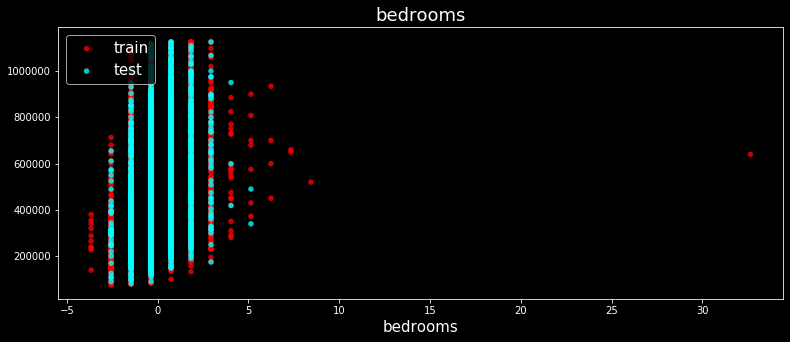

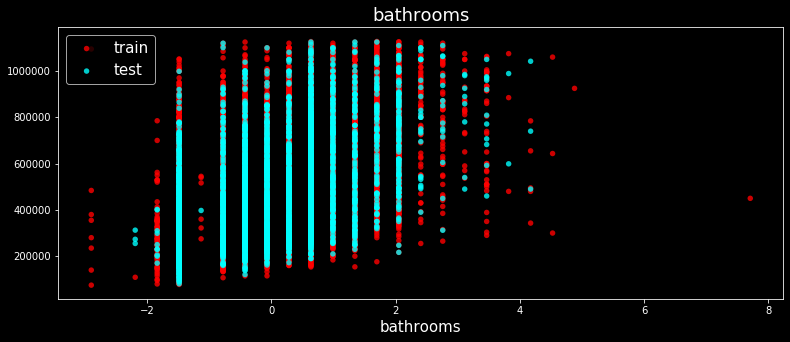

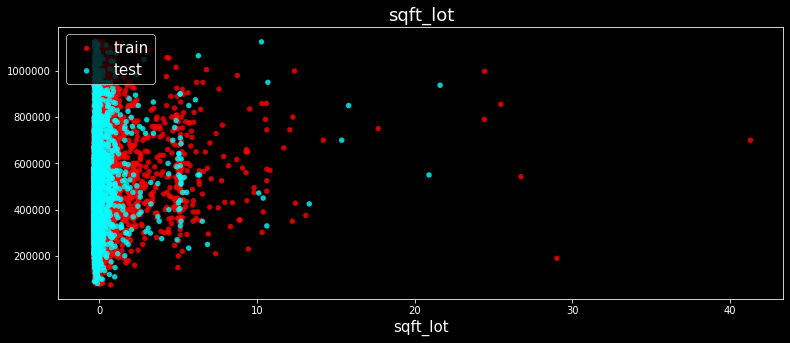

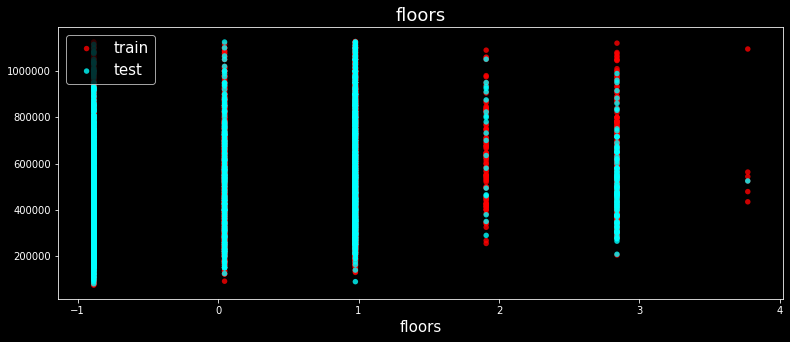

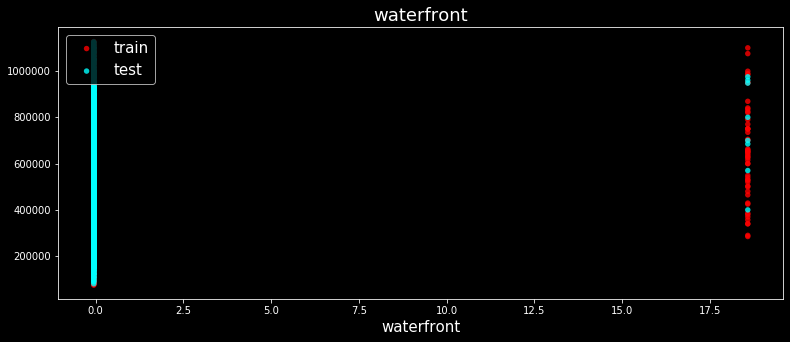

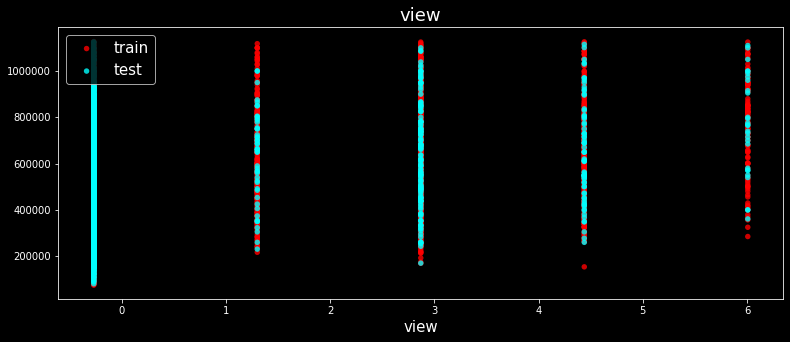

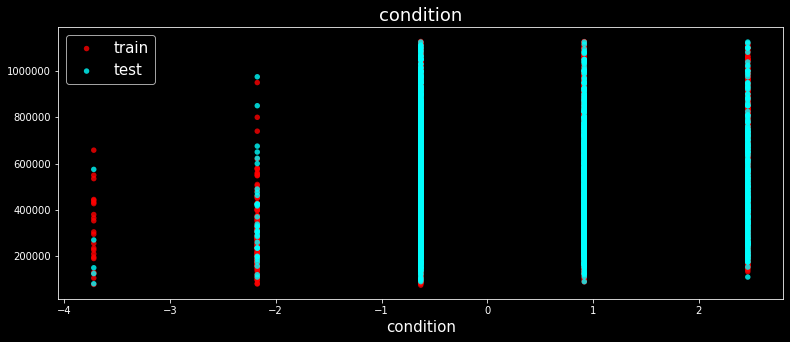

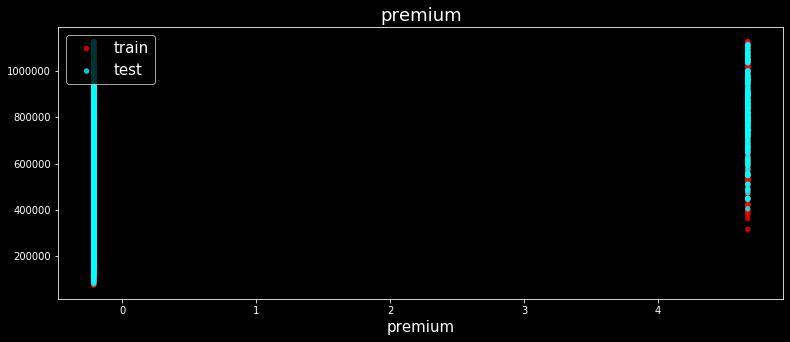

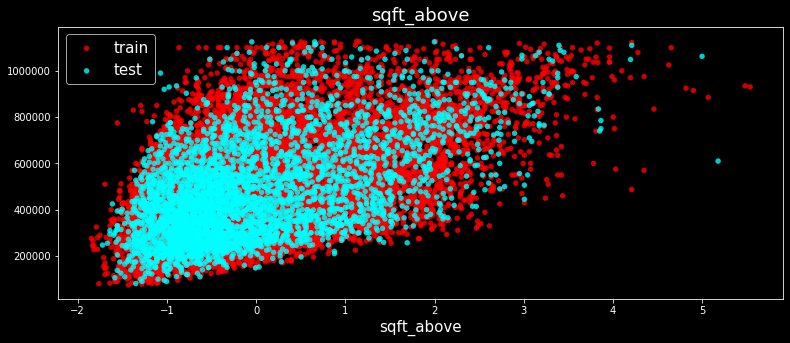

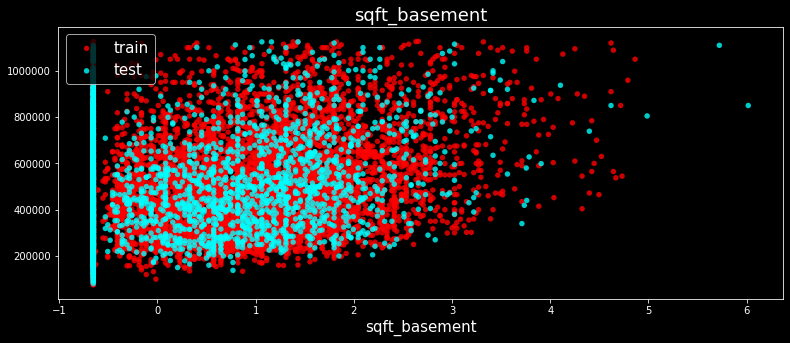

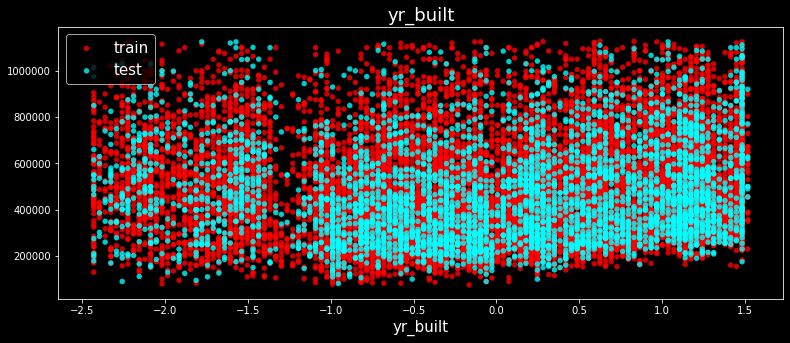

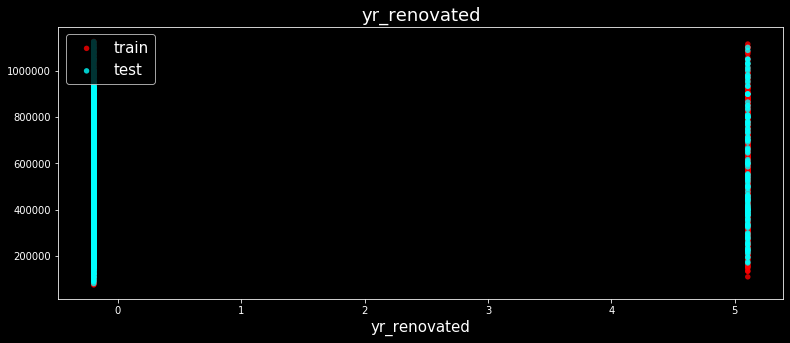

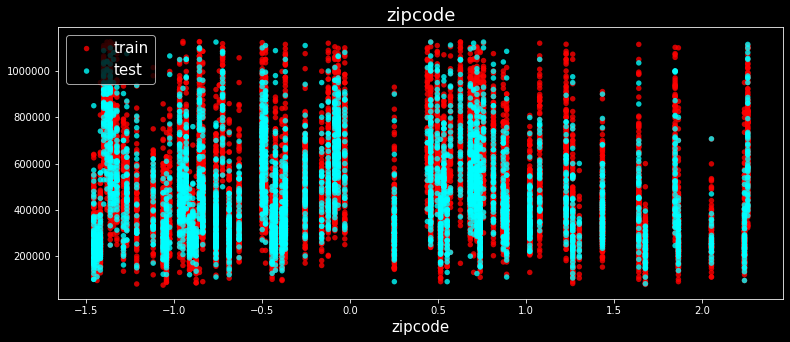

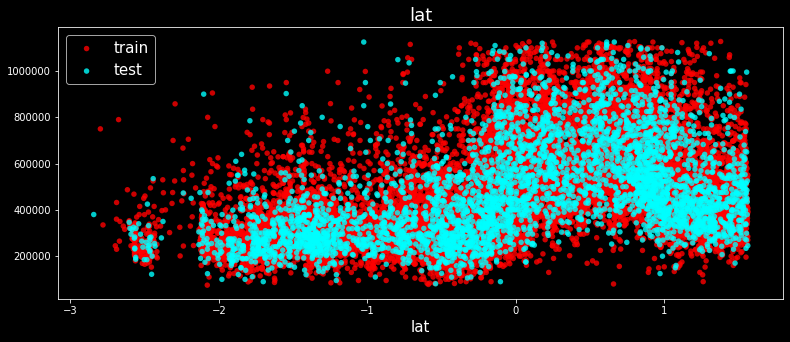

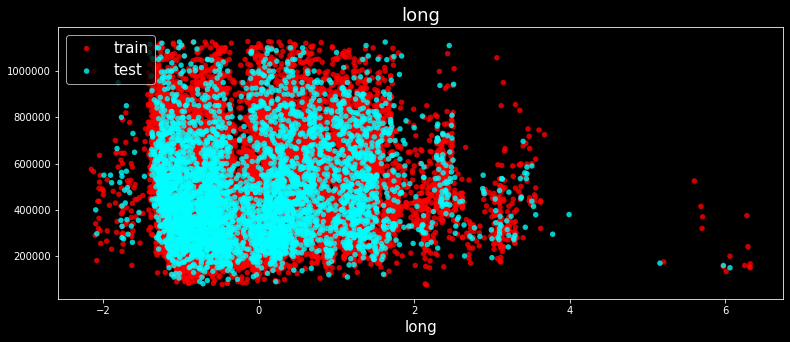

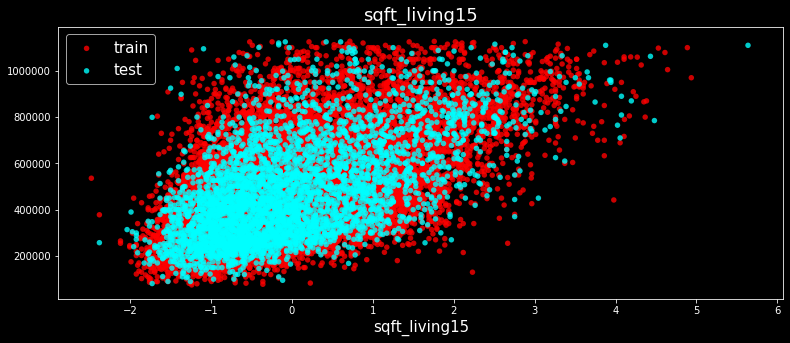

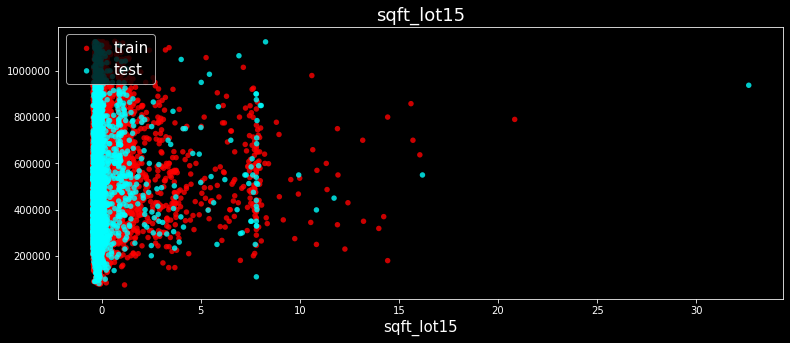

In [47]:
plt.rcParams["figure.figsize"] = [13,5]
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
show_data = ((x_train,y_train),(x_test,y_test))
colors = ("red", "cyan")
groups = ("train", "test")
for i in X.columns:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for d, color, group in zip(show_data, colors, groups):
        ax.scatter(d[0][i], d[1], alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    plt.title(i)
    plt.legend(loc=2)
    plt.xlabel(i)
    plt.show()  


 ## Small Conclusion about Data
  Looking on the heatmap and the plots above we can see that 
  'zipcode','sqft_lot','long','sqft_lot15' features 
  are redundant and don't have big influence on price --> can be dropped from our test and train dataset to save time.
   But if we needed more accurate model we wouldn't dropped them.
   

In [48]:
columns_to_drop = ['zipcode','sqft_lot','long','sqft_lot15']
x_test = x_test.drop(columns_to_drop, axis=1)
x_train = x_train.drop(columns_to_drop, axis=1)

## Sklearn Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

sk_learn = LinearRegression()
sk_learn.fit(x_test, y_test)
y_pred = sk_learn.predict(x_test)

In [50]:
def mean_absolute_percentage_error(y_true, y_pr): 
    y_true, y_pr = np.array(y_true), np.array(y_pr)
    return np.mean(np.abs((y_true - y_pr) / y_true)) * 100

def print_linear_stats(y_tst, y_pr):
    print('Mean Absolute Error:\t', metrics.mean_absolute_error(y_tst, y_pr))
    print('\nMean Absolute Percentage Error:\t ',mean_absolute_percentage_error(y_tst, y_pr))
    print('\nMean Squared Error:\t', metrics.mean_squared_error(y_tst, y_pr))  
    print('\nRoot Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_tst, y_pr)))
    print('\nExplained variance score:\t', metrics.explained_variance_score(y_tst, y_pr))
    print('\nR2 variance score: %.3f\t' % metrics.r2_score(y_tst, y_pr))

## My Linear Regression

In [51]:
class MyLinearRegression:
    
    def __init__(self, lrn_rate, itr):
        self.lrn_rate = lrn_rate
        self.weights_ = []
        self.cost_ = np.zeros(itr)
        self.itr_ = itr
        
    def fit(self, x, y):
        len = x.shape[0]
        x = np.c_[x, np.ones(len)] #adding 1 col to x values
        y = y.reshape(-1,1)
        self.weights_ = np.zeros((x.shape[1], 1)) 
        itr = 0
        while itr < self.itr_:
            y_pr = x.dot(self.weights_) # making predictions with weights
            diff = y_pr - y
            vctr = ((self.lrn_rate / len) * x.T.dot(diff)) # counting vector for gradient descent
            self.weights_ = self.weights_ - vctr
            self.cost_[itr] = ((diff ** 2).sum()) / (2 * len) # counting cost func for statistic
            itr += 1
        return self
    
    def predict(self, x):
        return (np.c_[x, np.ones(x.shape[0])]).dot(self.weights_).ravel()


my_linear = MyLinearRegression(0.001, 5000)  
my_linear.fit(x_train.values, y_train.values)
my_y_pred = my_linear.predict(x_test.values)

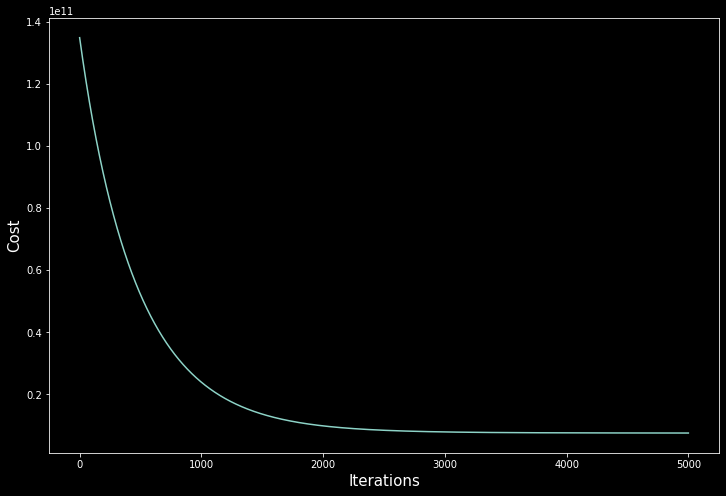

In [52]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(my_linear.itr_), my_linear.cost_)
# from it we can see that 4000-5000 iterations are enough for this model 

## Results


In [53]:
print('Library linear regression:\n\n')
print_linear_stats(y_test, y_pred)
print('\n\nMy linear regression:\n\n')
print_linear_stats(y_test,my_y_pred)

Library linear regression:


Mean Absolute Error:	 92573.87054495486

Mean Absolute Percentage Error:	  21.4440522517941

Mean Squared Error:	 15042346629.08001

Root Mean Squared Error:	 122647.24468605078

Explained variance score:	 0.6572741438472125

R2 variance score: 0.657	


My linear regression:


Mean Absolute Error:	 92806.83774266556

Mean Absolute Percentage Error:	  21.315754115862518

Mean Squared Error:	 15181856322.624912

Root Mean Squared Error:	 123214.67575993093

Explained variance score:	 0.6541907332488347

R2 variance score: 0.654	


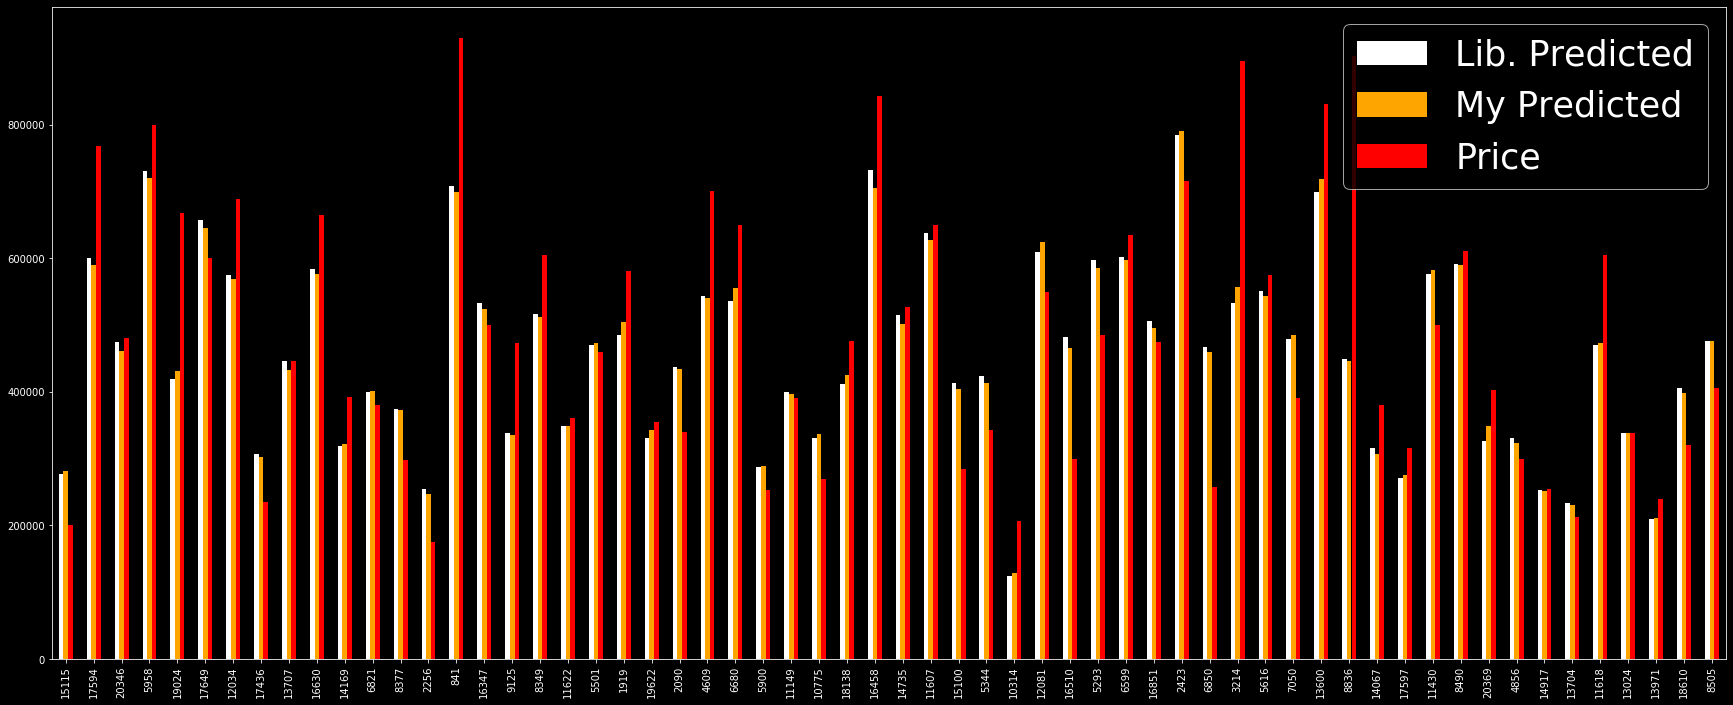

In [54]:
cmpr = pd.DataFrame({'Lib. Predicted':y_pred,'My Predicted':my_y_pred, 'Price':y_test})
cmpr.sample(60).plot(kind='bar',figsize=(30,12),color=('white','orange','red'))
plt.legend(loc=0,fontsize=35)
plt.show()

# Logistic Regression

In [55]:
Y = data['premium']
X = data.drop('premium', axis = 1)
X[X.columns] = scaler.fit_transform(X[X.columns])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = random_state)

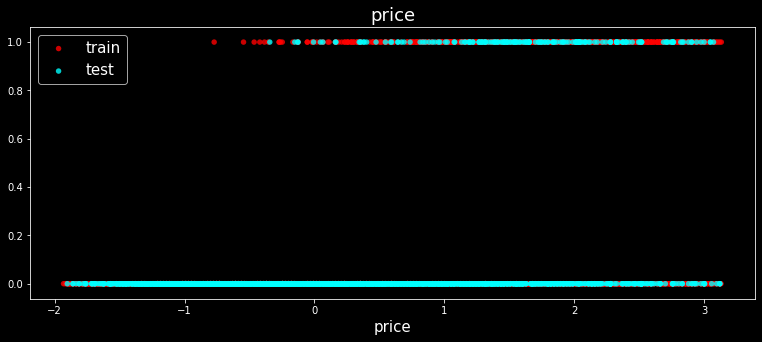

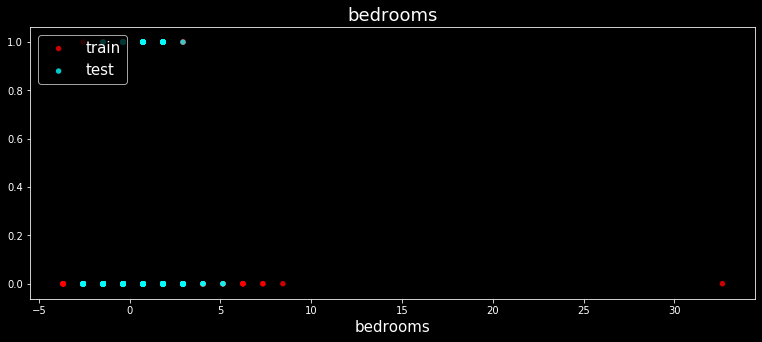

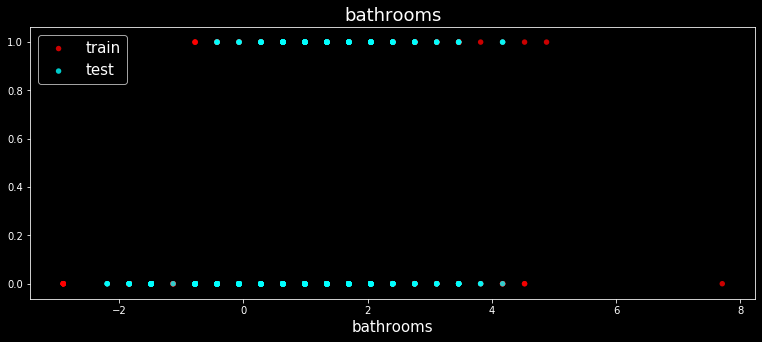

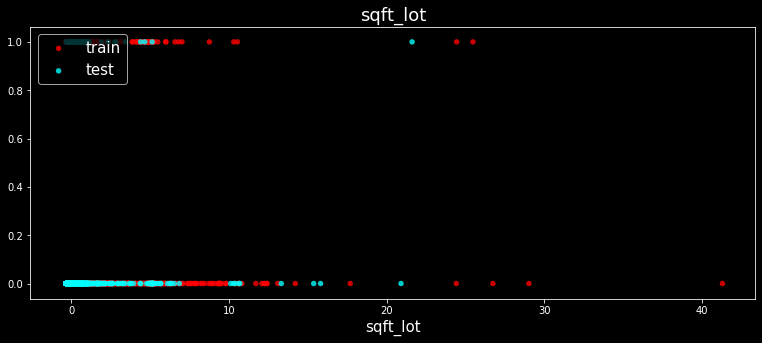

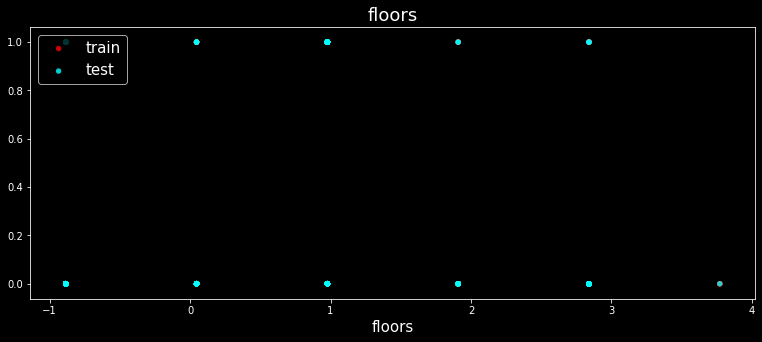

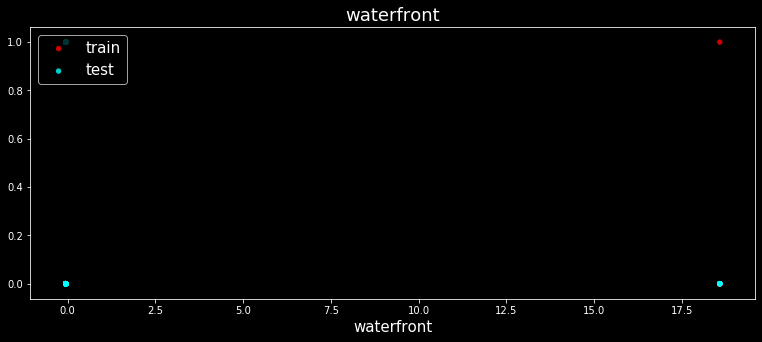

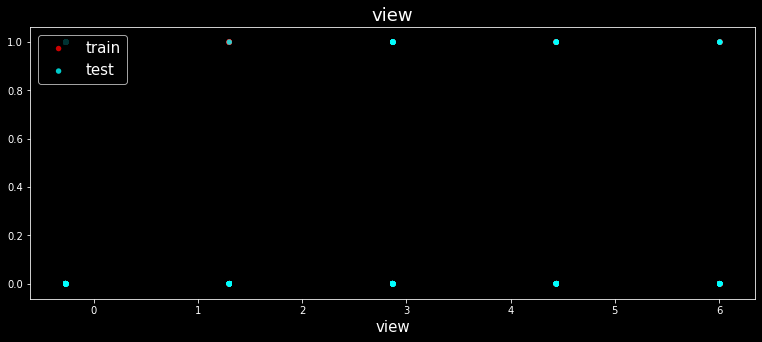

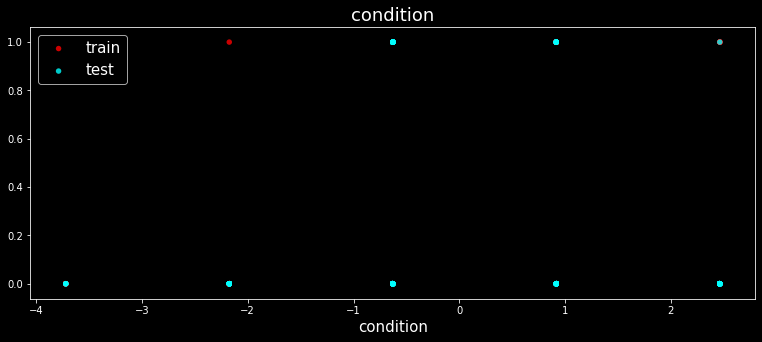

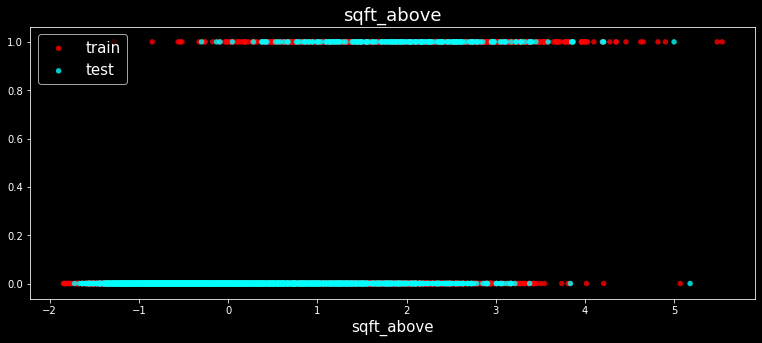

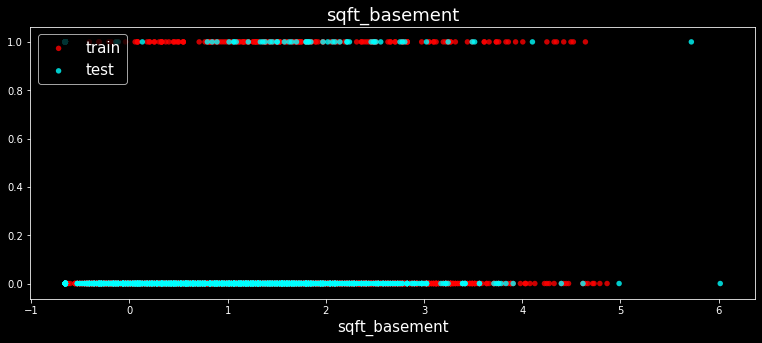

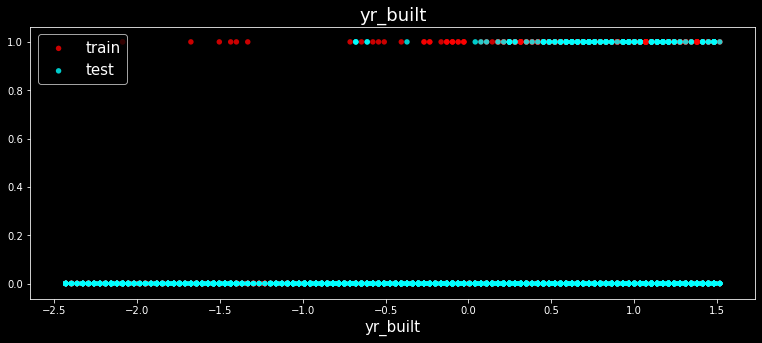

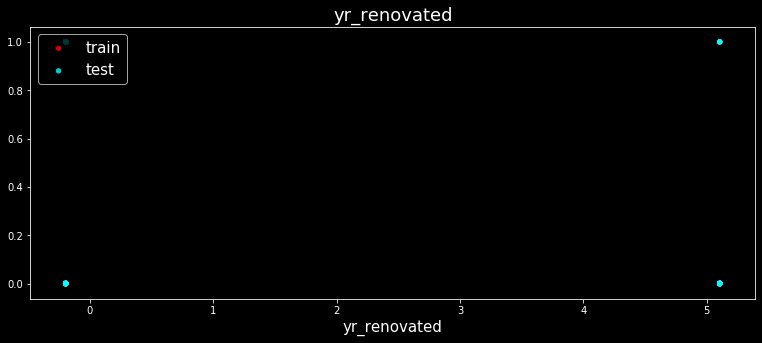

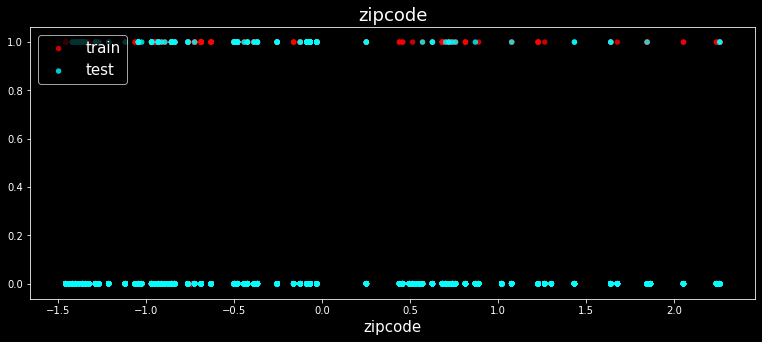

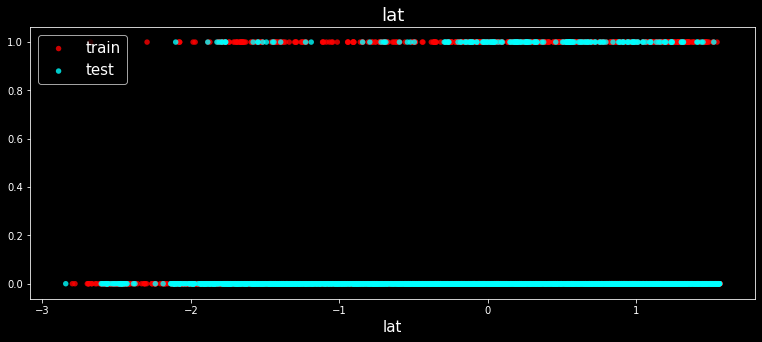

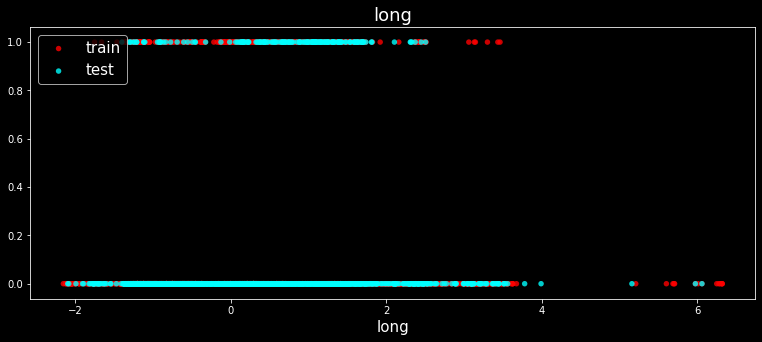

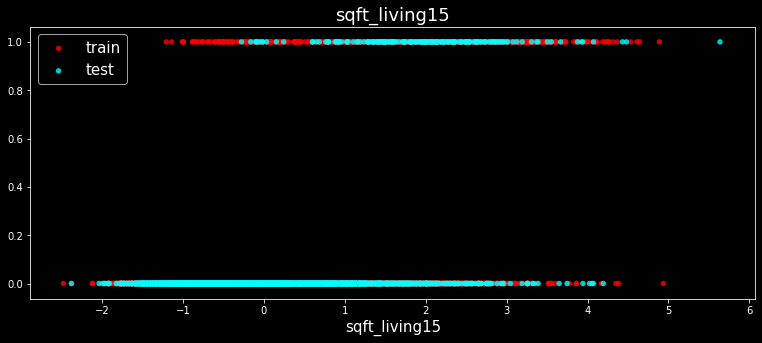

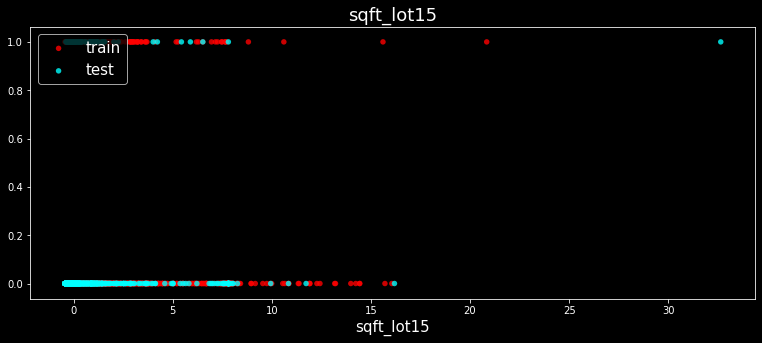

In [57]:
show_data = ((x_train,y_train),(x_test,y_test))
for i in X.columns:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for d, color, group in zip(show_data, colors, groups):
        ax.scatter(d[0][i], d[1], alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    plt.title(i)
    plt.legend(loc=2)
    plt.xlabel(i)
    plt.show()


 ## Small Conclusion about Data
   From above we can see that 'condition','sqft_basement','zipcode','yr_renovated','lat'
   features are redundant and don't have big influence on premium --> can be dropped from our test and train dataset to save time.
   But if we needed more accurate model we wouldn't dropped them.
   

In [58]:
columns_to_drop = ['condition','sqft_basement','zipcode','yr_renovated','lat']
x_test = x_test.drop(columns_to_drop, axis=1)
x_train = x_train.drop(columns_to_drop, axis=1)

 ## Sklearn logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression

sk_learn = LogisticRegression()
sk_learn.fit(x_test, y_test)
y_pred = sk_learn.predict(x_test)

params = {'C': [0.1, 0.001, 0.0001, 0.5, 0.9],
          'penalty': ['l1', 'l2'],
          'class_weight': ['balanced', None]
    
}

estimator = LogisticRegression(random_state=random_state)
kf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
    
gs = GridSearchCV(
    estimator=estimator,  
    param_grid=params,  
    cv=kf,  
    error_score=1,  # warnings only
    scoring='accuracy',  
    n_jobs=n_jobs,
    verbose=1,  
)

gs.fit(
    X=x_train,
    y=y_train
)


best_score = gs.best_score_
best_lr = gs.best_estimator_

y_pred = best_lr.predict(x_test)
print(f"Best logistic regression score: "
      f"{best_lr.score(x_test, y_test)}")

c:\users\beard\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    9.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:   11.3s finished
c:\users\beard\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best logistic regression score: 0.9630535845363347


In [60]:
def print_logical_stats(y_tst, y_pr):
    print('Mean Absolute Error:\t', metrics.mean_absolute_error(y_tst, y_pr))
    print('\nMean Squared Error:\t', metrics.mean_squared_error(y_tst, y_pr))
    print('\nAccuracy:\t', metrics.accuracy_score(y_tst, y_pr)) 
    print('\nPrecision:\t', metrics.precision_score(y_tst, y_pr)) 
    print('\nRecall:\t', metrics.recall_score(y_tst, y_pr)) 
    print('\nF1:\t', metrics.f1_score(y_tst, y_pr))
    

## My Logistic Regression

In [61]:
# sigmoid func
def sig(n):
    return 1.0 / (1 + np.exp(-n))    
        
class MyLogisticRegression:
    
    def __init__(self, lrn_rate, itr):
        self.lrn_rate = lrn_rate
        self.weights_ = []
        self.cost_ = np.zeros(itr)
        self.itr_ = itr
        
    def fit(self, x, y):
        len = x.shape[0]
        x = np.c_[x, np.ones(len)]
        y = y.reshape(-1,1)
        self.weights_ = np.zeros((x.shape[1], 1))
        itr = 0
        while itr < self.itr_:
            y_pr = sig(x.dot(self.weights_)) # use sig func. as an activation func.
            diff = y_pr - y
            vctr = ((self.lrn_rate / len) * x.T.dot(diff))
            self.weights_ = self.weights_ - vctr
            self.cost_[itr] = ((y * np.log(y_pr) + (1 - y) * np.log(1 - y_pr)).sum()) / (-1 * len)
            itr += 1                    # cost function 
        return self
    
    def predict(self, x):
        y_pr = sig((np.c_[x, np.ones(x.shape[0])]).dot(self.weights_)).ravel()
        y_pr = [int(pr >= 0.5) for pr in y_pr] # make predictions 0 or 1
        return y_pr
    
my_logistic = MyLogisticRegression(0.1, 2000)
my_logistic.fit(x_train.values, y_train.values)
my_y_pred = my_logistic.predict(x_test.values)

## Results

In [62]:
print('Library logical regression:\n\n')
print_logical_stats(y_test, y_pred)
print('\n\nMy logical regression:\n\n')
print_logical_stats(y_test, my_y_pred)

Library logical regression:


Mean Absolute Error:	 0.03694641546366528

Mean Squared Error:	 0.03694641546366528

Accuracy:	 0.9630535845363347

Precision:	 0.6410256410256411

Recall:	 0.4076086956521739

F1:	 0.4983388704318937


My logical regression:


Mean Absolute Error:	 0.036457058967457795

Mean Squared Error:	 0.036457058967457795

Accuracy:	 0.9635429410325422

Precision:	 0.6699029126213593

Recall:	 0.375

F1:	 0.48083623693379784


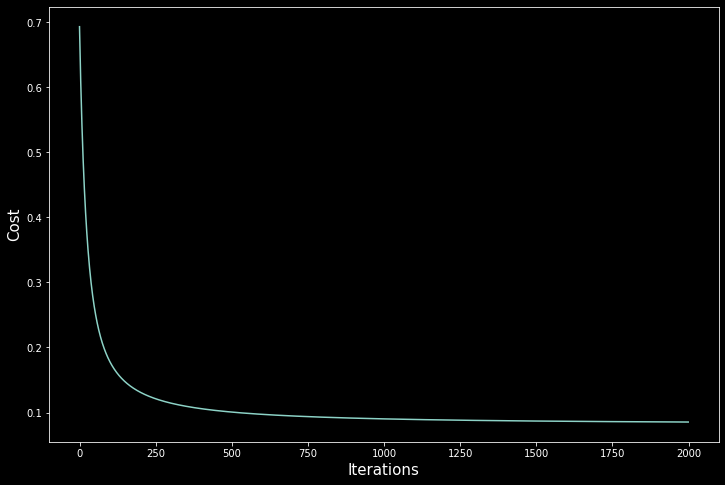

In [63]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(my_logistic.itr_), my_logistic.cost_)
#2000 iterations are enough for this learning rate